In [27]:
#mount google drive

from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [28]:
#load necessary libraries

import numpy as np
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, BatchNormalization, Activation
from keras.layers.convolutional import Conv2D, MaxPooling2D
from keras.constraints import maxnorm
from keras.utils import np_utils
import matplotlib.pyplot as plt

Now let's load in the dataset. We can do so simply by specifying which variables we want to load the data into, and then using the load_data() function:

In [29]:
#Load the dataset from keras datasets module

from keras.datasets import cifar10
 
(train_X,train_Y),(test_X,test_Y)=cifar10.load_data()

170500096/170498071 [==============================] - 2s 0us/step


In [31]:
#viewing the test-train splitted data

print(train_X.shape)
print(train_Y.shape)
print(test_X.shape)
print(test_Y.shape)

(50000, 32, 32, 3)
(50000, 1)
(10000, 32, 32, 3)
(10000, 1)


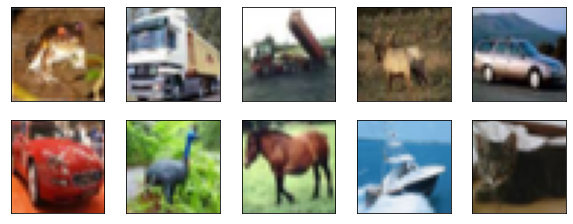

In [32]:
#Plot some images from the dataset to visualize the dataset

class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer',
               'dog', 'frog', 'horse', 'ship', 'truck']

plt.figure(figsize=(10,10))
for i in range(10):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_X[i], cmap=plt.cm.binary)
    # The CIFAR labels happen to be arrays, 
    # which is why you need the extra index
    #plt.xlabel(class_names[train_Y[i][0]])
plt.show()

In [33]:
#Import the required layers and modules to create our convolution neural net architecture

from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
from keras.layers import Flatten
from keras.constraints import maxnorm
from keras.optimizers import SGD
from keras.layers.convolutional import Conv2D
from keras.layers.convolutional import MaxPooling2D
from keras.utils import np_utils

One thing we'll need to do to get the data ready for the network is to one-hot encode the values. Images can't be used by the network as they are, so they need to be encoded first and one-hot encoding is best used when doing binary classification.

We are effectively doing binary classification here because an image either belongs to one class or it doesn't, it can't fall somewhere in-between. The Numpy command to_categorical() is used to one-hot encode. This is why we imported the np_utils function from Keras, as it contains to_categorical().

We also need to specify the number of classes that are in the dataset, so we know how many neurons to compress the final layer down to:

In [34]:
#Now perform the one-hot encoding for target classes

train_Y=np_utils.to_categorical(train_Y)
test_Y=np_utils.to_categorical(test_Y)
 
num_classes=test_Y.shape[1]

In most cases it's necessary to do some preprocessing of data to get it ready for use, but since we are using a prepackaged dataset, very little preprocessing needs to be done. One thing we should do is normalize the input data.

If the values of the input data are in too wide a range it can negatively impact how the network performs. In this case, the input values are the pixels in the image, which have a value between 0 to 255.

So in order to normalize the data we can simply divide the image values by 255. To do this we first need to make the data a float type, since they are currently integers. We can do this by using the astype() Numpy command and then declaring what data type we want:

In [35]:
#Convert the pixel values of the dataset to float type and then normalize the dataset

train_x=train_X.astype('float32')
test_X=test_X.astype('float32')
 
train_X=train_X/255.0
test_X=test_X/255.0

#Designing the Model

We've reached the stage where we design the CNN model. The first thing to do is define the format we would like to use for the model, Keras has several different formats or blueprints to build models on, but Sequential is the most commonly used, and for that reason, we have imported it from Keras.

The first layer of our model is a convolutional layer. It will take in the inputs and run convolutional filters on them.

When implementing these in Keras, we have to specify the number of channels/filters we want (that's the 32 below), the size of the filter we want (3 x 3 in this case), the input shape (when creating the first layer) and the activation and padding we need.

As mentioned, relu is the most common activation, and padding='same' just means we aren't changing the size of the image at all.


We can now repeat these layers to give our network more representations to work off of.

In [36]:
#Create the sequential model and add the layers

model=Sequential()

model.add(Conv2D(32,(3,3),input_shape=(32,32,3),padding='same',activation='relu',kernel_constraint=maxnorm(3)))
model.add(Dropout(0.2))
model.add(BatchNormalization())

model.add(Conv2D(64,(3,3),activation='relu',padding='same',kernel_constraint=maxnorm(3)))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.2))
model.add(BatchNormalization())

model.add(Conv2D(128,(3,3),activation='relu',padding='same',kernel_constraint=maxnorm(3)))
model.add(Dropout(0.2))
model.add(BatchNormalization())


#After we are done with the convolutional layers, we need to Flatten the data
#We'll also add a layer of dropout again and add Dense layer on top

model.add(Flatten())
model.add(Dropout(0.2))

model.add(Dense(128,activation='relu',kernel_constraint=maxnorm(3)))
model.add(Dropout(0.5))
model.add(BatchNormalization())

model.add(Dense(256,activation='relu',kernel_constraint=maxnorm(3)))
model.add(Dropout(0.5))
model.add(BatchNormalization())

model.add(Dense(512,activation='relu',kernel_constraint=maxnorm(3)))
model.add(Dropout(0.5))
model.add(BatchNormalization())

model.add(Dense(num_classes, activation='softmax'))

In [ ]:
# #Create the sequential model and adding the layers

# model=Sequential()
# model.add(Conv2D(32,(3,3),input_shape=(32,32,3),padding='same',activation='relu',kernel_constraint=maxnorm(3)))
# model.add(Dropout(0.2))
# model.add(BatchNormalization())
# model.add(Conv2D(32,(3,3),activation='relu',padding='same',kernel_constraint=maxnorm(3)))
# model.add(MaxPooling2D(pool_size=(2,2)))

# #Add Dense layers on top
# model.add(Flatten())
# model.add(Dense(512,activation='relu',kernel_constraint=maxnorm(3)))
# model.add(Dropout(0.5))
# model.add(Dense(num_classes, activation='softmax'))

We're going to use a random seed here so that the results achieved in this project can be replicated.
And now that we've designed the model we want to use, we just have to compile it. Let's specify the optimizer we want to use.

The optimizer is what will tune the weights in your network to approach the point of lowest loss. The Adam algorithm is one of the most commonly used optimizers because it gives great performance on most problems.

In [38]:
#defining random seed and optimizer for model evaluation

np.random.seed(21)
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [39]:
#checking model summary

model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 32, 32, 32)        896       
_________________________________________________________________
dropout_1 (Dropout)          (None, 32, 32, 32)        0         
_________________________________________________________________
batch_normalization_1 (Batch (None, 32, 32, 32)        128       
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 32, 32, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 16, 16, 64)        0         
_________________________________________________________________
dropout_2 (Dropout)          (None, 16, 16, 64)        0         
_________________________________________________________________
batch_normalization_2 (Batch (None, 16, 16, 64)       

Now we get to training the model. To do this, all we have to do is call the fit() function on the model and pass in the chosen parameters.

Here's where I use the seed I chose, for the purposes of reproducibility.

In [40]:
# Train the model
history = model.fit(train_X,train_Y, validation_data=(test_X,test_Y), epochs=20, batch_size=64)

Train on 50000 samples, validate on 10000 samples
Epoch 1/20
50000/50000 [==============================] - 496s 10ms/step - loss: 1.8435 - accuracy: 0.3474 - val_loss: 1.3114 - val_accuracy: 0.5275
Epoch 2/20
50000/50000 [==============================] - 491s 10ms/step - loss: 1.3002 - accuracy: 0.5328 - val_loss: 1.0380 - val_accuracy: 0.6273
Epoch 3/20
50000/50000 [==============================] - 491s 10ms/step - loss: 1.1229 - accuracy: 0.6062 - val_loss: 0.9156 - val_accuracy: 0.6747
Epoch 4/20
50000/50000 [==============================] - 493s 10ms/step - loss: 1.0487 - accuracy: 0.6360 - val_loss: 0.8960 - val_accuracy: 0.6869
Epoch 5/20
50000/50000 [==============================] - 491s 10ms/step - loss: 1.0102 - accuracy: 0.6524 - val_loss: 0.8419 - val_accuracy: 0.7076
Epoch 6/20
50000/50000 [==============================] - 493s 10ms/step - loss: 0.9726 - accuracy: 0.6679 - val_loss: 0.9639 - val_accuracy: 0.6585
Epoch 7/20
50000/50000 [==============================] 

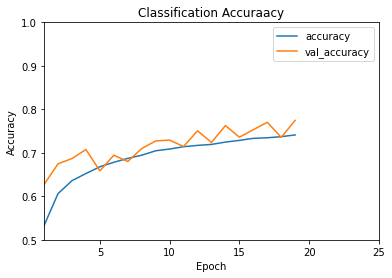

In [41]:
#Evaluate the model

plt.title('Classification Accuraacy')
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1])
plt.xlim([1, 25])
plt.legend(loc='upper right')

test_loss, test_acc = model.evaluate(test_X,  test_Y, verbose=0)

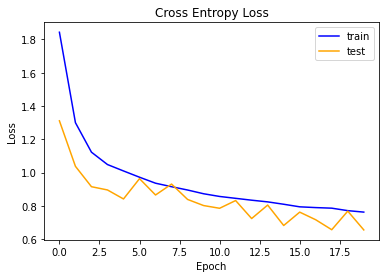

In [43]:
# plot loss

plt.title('Cross Entropy Loss')
plt.plot(history.history['loss'], color='blue', label='train')
plt.plot(history.history['val_loss'], color='orange', label='test')
plt.xlabel('Epoch')
plt.ylabel('Loss')
# plt.ylim([0.5, 1])
# plt.xlim([1, 25])
plt.legend(loc='upper right')

In most cases we choose a validation set that is different from the testing set, and so we'd specify a percentage of the training data to use as the validation set. In this case, we'll just pass in the test data to make sure the test data is set aside and not trained on.

Now we can evaluate the model and see how it performed. Just call model.evaluate()

In [49]:
#Calculate its accuracy on testing data

score = model.evaluate(test_X,  test_Y, verbose=0)
print("Validation Accuracy = %.2f%%" % (score[1]*100))


#Calculate its accuracy on training data

score = model.evaluate(train_X,  train_Y, verbose=0)
print("\nTraining Accuracy = %.2f%%" % (score[1]*100))

Validation Accuracy = 77.46%

Training Accuracy = 84.11%


**Save Final Model**

In [45]:
#Save the model

model = model.save("model_final_20.h5")


In [50]:
#Make a dictionary to map to the output classes and make predictions from the model

results={
   0:'Aeroplane',
   1:'Automobile',
   2:'Bird',
   3:'Cat',
   4:'Deer',
   5:'Dog',
   6:'Frog',
   7:'Horse',
   8:'Ship',
   9:'Truck'
}

class color:
   PURPLE = '\033[95m'
   CYAN = '\033[96m'
   DARKCYAN = '\033[36m'
   BLUE = '\033[94m'
   GREEN = '\033[92m'
   YELLOW = '\033[93m'
   RED = '\033[91m'
   BOLD = '\033[1m'
   UNDERLINE = '\033[4m'
   END = '\033[0m'

In [65]:
# load and evaluate a saved model
from numpy import loadtxt
from keras.models import load_model
 
# load model
model = load_model('/content/drive/My Drive/Image classification minor/model1_cifar_25epoch.h5')
# summarize model.
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_5 (Conv2D)            (None, 32, 32, 32)        896       
_________________________________________________________________
dropout_5 (Dropout)          (None, 32, 32, 32)        0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 32, 32, 32)        9248      
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 16, 16, 32)        0         
_________________________________________________________________
flatten_3 (Flatten)          (None, 8192)              0         
_________________________________________________________________
dense_5 (Dense)              (None, 512)               4194816   
_________________________________________________________________
dropout_6 (Dropout)          (None, 512)              

In [66]:
#Import libraries to work with an image file

from PIL import Image

Index : 3 
Class : Cat


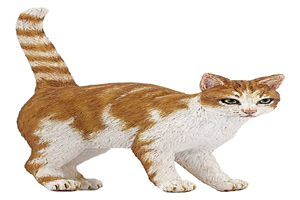

In [68]:
#input the image, resize it 32, 32

# 'cv2.imread' returns numpy array, containing the pixel values.
#For colored images, each pixel is represented as an array containing Red, Green and Blue channels.
img = Image.open("/content/drive/My Drive/Image classification minor/test_image/Copy of 8.jpg")

# the input image is required to be in the shape of dataset, i.e (32,32,3)
#res = cv2.resize(img, dsize=(32, 32), interpolation=cv2.INTER_CUBIC)
image = img.resize((32,32))
image = np.expand_dims(image, axis=0)
image = np.array(image)

#predicting the class of the input image
pred=model.predict_classes([image])[0]
print(color.BOLD+"Index :",pred,"\nClass :",results[pred] + color.END)
img = img.resize((300,200))
img